<a href="https://colab.research.google.com/github/zowette/clustering/blob/main/clustering_sketch_Nov_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U --pre pycaret
!pip install pycaret[analysis]
!pip install interpret-community


In [4]:
import pandas as pd
data2017 = pd.read_stata("/content/sample_data/HCMST2017.dta")


In [5]:

import matplotlib.pyplot as plt


In [6]:
features = [
            "w6_sex_frequency",
            "w6_otherdate",
            "partyid7",
            "ppc10017",
            "ppc21310",
            "ppp20071",
            "ppp20072",
            "ppage",
            "ppagecat",
            "ppagect4",
            "ppeduc",
            "ppeducat",
            "ppethm",
            "ppgender",
            "pphhhead",
            "pphhsize",
            "pphouse",
            "ppincimp",
            "ppmarit",
            "ppmsacat",
            "PPREG4",
            "ppreg9",
            "pprent",
            "PPT01",
            "PPT25",
            "PPT612",
            "PPT1317",
            "PPT18OV",
            "ppwork",
            "w6_q6b",
            "w6_q9",
            "w6_q10",
            "w6_q12",
            "w6_q16",
            "w6_q17",
            "w6_attraction",
            "w6_q21a_year",
            "w6_same_sex_couple_gender",
            "w6_identity_all",
            "w6_q23",
            "w6_q25",
            "w6_q27",
            "w6_q28", 
            "w6_q32",
            "w6_q34",
            "w6_otherdate_all",
            "w6_number_people_met",
            "w6_otherdate_dichotomous",
            "relate_duration_at_w6_years",
            "year_fraction_met",
            "year_fraction_relstart",
            "age_when_met",
            "time_from_met_to_rel",
            "year_fraction_first_cohab",
            "time_from_rel_to_cohab",
            "w6_relationship_quality",
            "hcm2017q24_R_friend",
            "hcm2017q24_R_family",
            "hcm2017q24_R_sig_other",
            "hcm2017q24_R_neighbor",
            "hcm2017q24_P_cowork",
            "hcm2017q24_P_friend",
            "hcm2017q24_P_family",
            "hcm2017q24_P_sig_other",
            "hcm2017q24_P_neighbor",
            "hcm2017q24_btwn_I_cowork",
            "hcm2017q24_btwn_I_friend",
            "hcm2017q24_btwn_I_family",
            "hcm2017q24_btwn_I_sig_other",
            "hcm2017q24_btwn_I_neighbor",
            "hcm2017q24_school",
            "hcm2017q24_college",
            "hcm2017q24_mil",
            "hcm2017q24_church",
            "hcm2017q24_vol_org",
            "hcm2017q24_customer",
            "hcm2017q24_bar_restaurant",
            "hcm2017q24_party",
            "hcm2017q24_internet_other",
            "hcm2017q24_internet_dating",
            "hcm2017q24_internet_soc_network",
            "hcm2017q24_internet_game",
            "hcm2017q24_internet_chat",
            "hcm2017q24_internet_org",
            "hcm2017q24_public",
            "hcm2017q24_blind_date",
            "hcm2017q24_vacation",
            "hcm2017q24_single_serve_nonint",
            "hcm2017q24_business_trip",
            "hcm2017q24_work_neighbors",
            "hcm2017q24_met_online",
            "hcm2017q24_met_through_family",
            "hcm2017q24_met_through_friend",
            "hcm2017q24_met_through_as_nghbrs",
            "hcm2017q24_met_as_through_cowork",
            ]

In [7]:
from sklearn import feature_selection
# df_data2017 = data2017.dropna(axis='columns')
droplist = ["ppagecat", "ppagect4","ppeduc"]
#df_data2017 = data2017[data2017.columns[pd.Series(data2017.columns).str.startswith('pp')]]
df_data2017 = data2017[features]
df_data2017 = df_data2017.dropna(axis='columns', thresh=3000)
df_data2017["ppage"]


0       30
1       55
2       47
3       28
4       59
        ..
3505    27
3506    24
3507    41
3508    32
3509    43
Name: ppage, Length: 3510, dtype: category
Categories (76, int64): [18 < 19 < 20 < 21 ... 90 < 91 < 92 < 93]

In [8]:
# columns = df_data2017.columns

# for column in columns:
#     df_data2017[column]=df_data2017[column].astype('category').cat.codes

# df_data2017["ppage"]


In [9]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaled_df_kmeans = scaler.fit_transform(df_data2017)

In [10]:
# from sklearn.cluster import KMeans
# kmeans_model = KMeans(n_clusters=4)
# clusters = kmeans_model.fit_predict(df_data2017)
# df_data2017.insert(df_data2017.columns.get_loc("ppc10017"), "Cluster", clusters)
# df_data2017.head(4)

In [11]:
# import matplotlib.pyplot as plt
# ssd = []
# for k in range(2, 9):
#     kmeans_model = KMeans(n_clusters=k)
#     kmeans_model.fit(df_data2017)
#     ssd.append(kmeans_model.inertia_)
# plt.figure(figsize=(6, 4), dpi=100)
# plt.plot(range(2, 9), ssd, color="green", marker="o")
# plt.xlabel("Number of clusters (K)")
# plt.ylabel("SSD for K")
# plt.show()

In [12]:
from pycaret.clustering import *

In [13]:
clu = setup(df_data2017,
            session_id = 123, ignore_features=droplist)

In [14]:
kmeans = create_model('kmeans', num_clusters=5)

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [15]:
kmeans

KMeans(n_clusters=5, random_state=123)

In [16]:
kmean_results = assign_model(kmeans)
kmean_results.head()

partyid7 ppc10017   ppc21310   ppp20071  \
0         Leans Democrat      Yes  Every day  Not asked   
1  Not Strong Republican      Yes  Every day         No   
2         Leans Democrat      Yes  Every day        Yes   
3        Strong Democrat      Yes  Every day         No   
4        Strong Democrat      Yes  Every day         No   

                ppp20072 ppage                     ppeducat  \
0                  Never    30                 Some college   
1                  Never    55  Bachelor's degree or higher   
2  Once or twice a month    47  Bachelor's degree or higher   
3                  Never    28        Less than high school   
4    Once a year or less    59  Bachelor's degree or higher   

                ppethm ppgender pphhhead  ... hcm2017q24_vacation  \
0  White, Non-Hispanic     Male      Yes  ...                  no   
1  White, Non-Hispanic   Female      Yes  ...                  no   
2  White, Non-Hispanic     Male      Yes  ...                  no   
3  White, Non-Hispanic   Female       No  ...                  no   
4  White, Non-Hispanic   Female      Yes  ...                  no   

  hcm2017q24_single_serve_nonint hcm2017q24_business_trip  \
0                             no                       no   
1                             no                       no   
2                             no                       no   
3                             no                       no   
4                             no                       no   

  hcm2017q24_work_neighbors hcm2017q24_met_online  \
0                        no                   yes   
1                        no                    no   
2                        no                   yes   
3                        no                   yes   
4                        no                    no   

  hcm2017q24_met_through_family hcm2017q24_met_through_friend  \
0                            no                            no   
1                            no                            no   
2                            no                            no   
3                            no                            no   
4                            no                            no   

  hcm2017q24_met_through_as_nghbrs hcm2017q24_met_as_through_cowork    Cluster  
0                               no                               no  Cluster 4  
1                               no                              yes  Cluster 3  
2                               no                               no  Cluster 2  
3                               no                               no  Cluster 4  
4                              yes                               no  Cluster 3  

[5 rows x 86 columns]

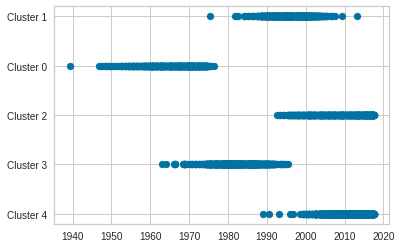

In [18]:
plt.scatter(kmean_results["year_fraction_met"], kmean_results["Cluster"])

plt.show()

In [19]:
plot_model(kmeans)

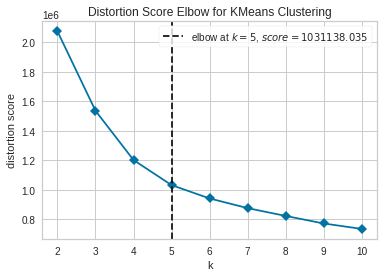

In [20]:
plot_model(kmeans, plot = 'elbow')

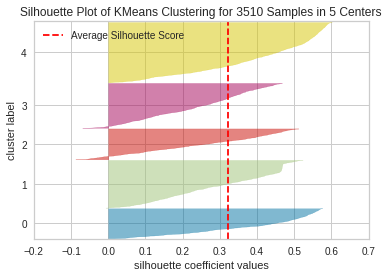

In [21]:
plot_model(kmeans, plot = 'silhouette')

In [22]:
plot_model(kmeans, plot = 'distribution')

In [23]:
# plot_model(kmeans, plot = 'tsne')

In [24]:
kmean_results['ppage'].to_frame()

ppage
0       30
1       55
2       47
3       28
4       59
...    ...
3505    27
3506    24
3507    41
3508    32
3509    43

[3510 rows x 1 columns]

In [162]:
from pycaret.classification import *

In [163]:
# df[columns] = df[columns].astype("Int8")
# clf1 = setup(data = kmean_results, target = 'Cluster', ignore_features = droplist, numeric_features=['ppage','pphhsize','PPT01','PPT25','PPT612','PPT1317','PPT18OV','w6_q9','w6_q16','w6_q16','w6_q21a_year','w6_number_people_met'])
clf1 = setup(data = kmean_results, target = 'Cluster', ignore_features = droplist)

In [27]:
# best = compare_models(exclude = ["knn","lda"])

In [164]:
best  = create_model('et')   

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

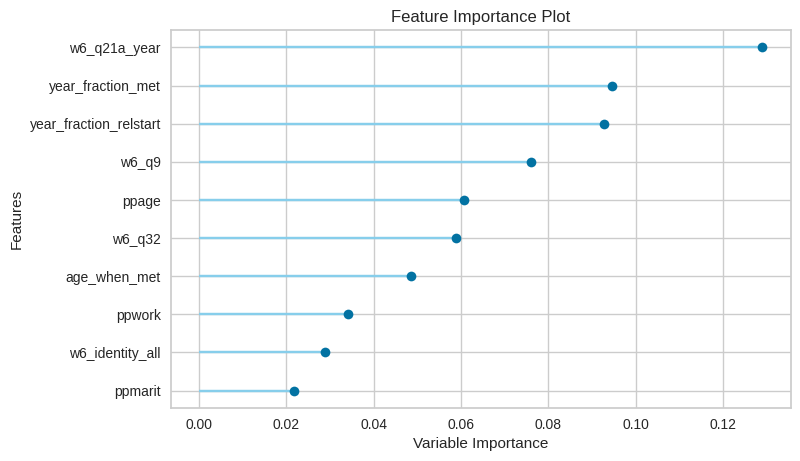

In [165]:
plot_model(estimator = best, plot = 'feature')


In [ ]:
interpret_model(best, plot = 'correlation', feature = 'year_fraction_met')

In [ ]:
best

In [ ]:


interpret_model(best, plot = 'correlation', feature = 'ppwork')


In [43]:
import seaborn as sns
c = kmean_results.w6_q32.astype('category')

d = dict(enumerate(c.cat.categories))
d

{0: 'Refused',
 1: 'No, I did NOT meet [Partner Name] through the Internet',
 2: 'Yes, a social networking site (like Facebook or Myspace)',
 3: 'Yes, an Internet dating or matchmaking site (like eHarmony or match.com)',
 4: 'Yes, an Internet classified advertising site (like Craigslist)',
 5: 'Yes, an Internet chat room',
 6: 'Yes, a different kind of Internet service',
 7: 'Yes, an app on my phone (like Tinder or Grindr)'}

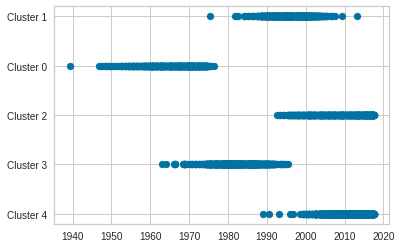

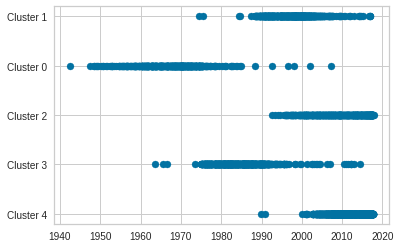

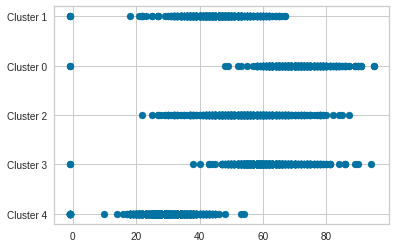

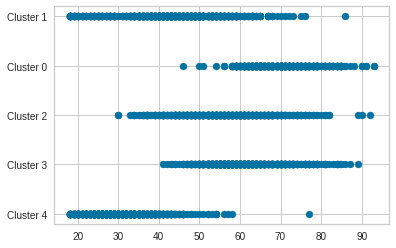

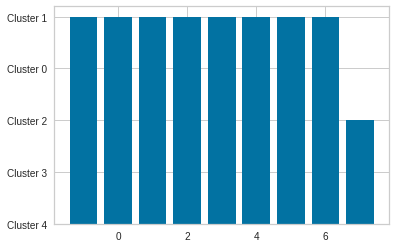

In [47]:
plt.scatter(kmean_results["year_fraction_met"], kmean_results["Cluster"])
plt.show()

plt.scatter(kmean_results["year_fraction_relstart"], kmean_results["Cluster"])
plt.show()

plt.scatter(kmean_results["w6_q9"], kmean_results["Cluster"])
plt.show()

plt.scatter(kmean_results["ppage"], kmean_results["Cluster"])
plt.show()

# kmean_results["w6_q32"] = kmean_results["w6_q32"].astype('float')
# kmean_results["w6_q32"]=kmean_results["w6_q32"].astype('Int32')

plt.bar(kmean_results["w6_q32"].astype("category").cat.codes, kmean_results["Cluster"])
plt.show()

In [53]:
from pycaret.clustering import *

In [233]:
droplist_age = ['year_fraction_met', 'w6_q21a_year', 'year_fraction_relstart', 'ppage', 'w6_q9', 'age_when_met', "w6_q16"]

In [260]:
cluster_mean = kmean_results.groupby(by=["Cluster"]).mean()
cluster_median = kmean_results.groupby(by=["Cluster"]).mean()
cluster_mean

w6_q9    w6_q16    w6_q17  w6_q21a_year  w6_number_people_met  \
Cluster                                                                        
Cluster 0  70.479675  3.441057  1.114053   1965.081299              0.084189   
Cluster 1  45.076103  2.656888  1.046547   1995.472046              0.337652   
Cluster 2  53.776001  2.755424  1.374753   2007.899414              0.755952   
Cluster 3  60.683853  3.316147  1.332879   1981.765015              0.110807   
Cluster 4  29.019230  3.942424  0.523279   2010.225342              0.798165   

           year_fraction_met  year_fraction_relstart  age_when_met  \
Cluster                                                              
Cluster 0        1965.583008             1967.759521     18.254065   
Cluster 1        1995.969238             1997.813477     23.860800   
Cluster 2        2008.370117             2009.063110     47.214989   
Cluster 3        1982.245850             1984.745483     25.325136   
Cluster 4        2010.723511             2011.861206     23.016243   

           time_from_met_to_rel  
Cluster                          
Cluster 0              2.078338  
Cluster 1              1.801722  
Cluster 2              0.695572  
Cluster 3              2.323927  
Cluster 4              1.154441

In [261]:
cluster_mean[["year_fraction_met", "age_when_met", "w6_q16", "time_from_met_to_rel", "w6_number_people_met"]]

year_fraction_met  age_when_met    w6_q16  time_from_met_to_rel  \
Cluster                                                                      
Cluster 0        1965.583008     18.254065  3.441057              2.078338   
Cluster 1        1995.969238     23.860800  2.656888              1.801722   
Cluster 2        2008.370117     47.214989  2.755424              0.695572   
Cluster 3        1982.245850     25.325136  3.316147              2.323927   
Cluster 4        2010.723511     23.016243  3.942424              1.154441   

           w6_number_people_met  
Cluster                          
Cluster 0              0.084189  
Cluster 1              0.337652  
Cluster 2              0.755952  
Cluster 3              0.110807  
Cluster 4              0.798165

In [ ]:
# plt.figure(figsize=(10,10))
# plt.hist(cluster_mean.index, cluster_mean["year_fraction_met"])

# plt.show()

In [ ]:
kmean_results.groupby(by=["Cluster"]).mean()

In [55]:



cluster0 = kmean_results[kmean_results["Cluster"] == "Cluster 0"].reset_index(drop=True)
cluster1 = kmean_results[kmean_results["Cluster"] == "Cluster 1"].reset_index(drop=True)
cluster2 = kmean_results[kmean_results["Cluster"] == "Cluster 2"].reset_index(drop=True)
cluster3 = kmean_results[kmean_results["Cluster"] == "Cluster 3"].reset_index(drop=True)
cluster4 = kmean_results[kmean_results["Cluster"] == "Cluster 4"].reset_index(drop=True)
cluster5 = kmean_results[kmean_results["Cluster"] == "Cluster 5"].reset_index(drop=True)

**Cluster one**

---



In [234]:
from pycaret.clustering import *

In [235]:
clu0 = setup(kmean_results[kmean_results['Cluster'].str.contains("0")],
            session_id = 123, ignore_features=droplist_age)

In [236]:
kmeans0 = create_model('kmeans', num_clusters=4)

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

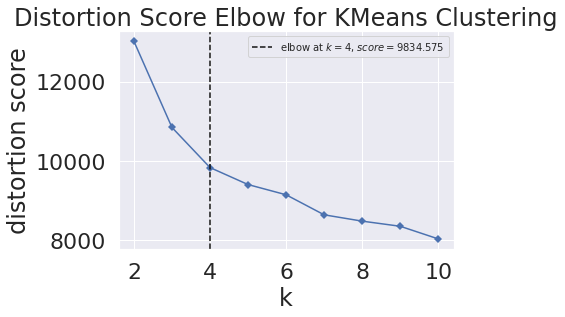

In [237]:
plot_model(kmeans0, plot = 'elbow')

In [238]:
plot_model(kmeans0, plot = 'distribution')

In [239]:
# plot_model(kmeans0, plot = 'tsne')

In [240]:
plot_model(kmeans0, plot = 'cluster')

In [241]:
kmean_results0 = assign_model(kmeans0)
kmean_results0.head()



partyid7 ppc10017                                ppc21310  \
0        Strong Democrat      Yes                               Every day   
1  Not Strong Republican      Yes                               Every day   
2  Not Strong Republican      Yes                               Every day   
3         Leans Democrat       No                               Every day   
4        Strong Democrat      Yes  At least once a week but not every day   

    ppp20071             ppp20072                     ppeducat  \
0  Not asked          Once a week  Bachelor's degree or higher   
1         No   A few times a year                  High school   
2         No          Once a week                 Some college   
3         No  Once a year or less  Bachelor's degree or higher   
4         No  Once a year or less                  High school   

                ppethm ppgender pphhhead pphhsize  ... hcm2017q24_vacation  \
0  White, Non-Hispanic     Male      Yes        2  ...                  no   
1  White, Non-Hispanic     Male      Yes        2  ...                  no   
2  White, Non-Hispanic   Female      Yes        1  ...                  no   
3             Hispanic     Male      Yes        2  ...                  no   
4  Black, Non-Hispanic     Male      Yes        2  ...                  no   

  hcm2017q24_single_serve_nonint hcm2017q24_business_trip  \
0                             no                       no   
1                             no                       no   
2                             no                       no   
3                             no                       no   
4                             no                       no   

  hcm2017q24_work_neighbors hcm2017q24_met_online  \
0                        no                    no   
1                        no                    no   
2                        no                    no   
3                        no                    no   
4                        no                    no   

  hcm2017q24_met_through_family hcm2017q24_met_through_friend  \
0                            no                           yes   
1                           yes                            no   
2                            no                           yes   
3                            no                            no   
4                            no                           yes   

  hcm2017q24_met_through_as_nghbrs hcm2017q24_met_as_through_cowork    Cluster  
0                               no                               no  Cluster 1  
1                              yes                               no  Cluster 1  
2                               no                              yes  Cluster 1  
3                               no                              yes  Cluster 1  
4                               no                               no  Cluster 1  

[5 rows x 79 columns]

In [242]:
from pycaret.classification import *

In [243]:
clf1 = setup(data = kmean_results0, target = 'Cluster', ignore_features = droplist_age)
cluster0  = create_model('et') 


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

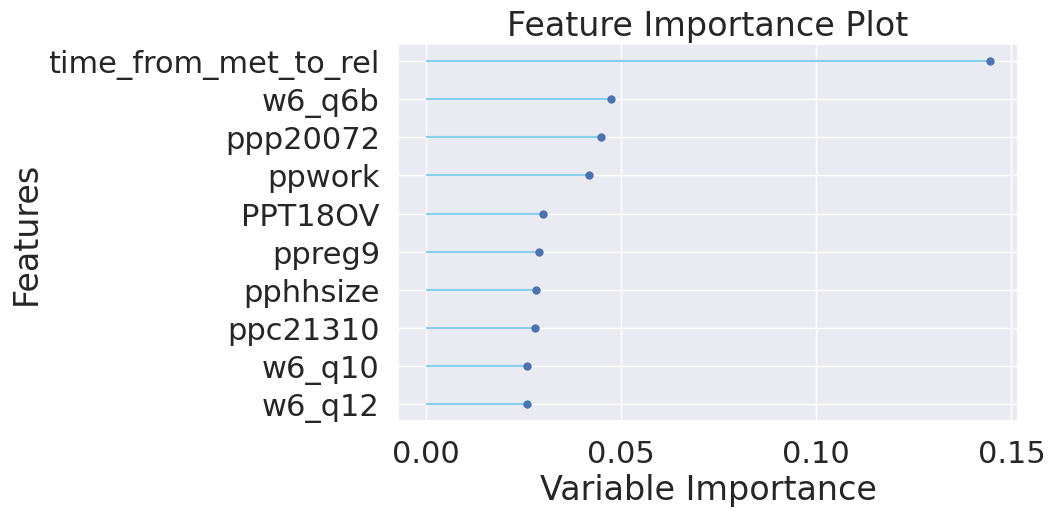

In [245]:
plot_model(estimator = cluster0, plot = 'feature')

**Cluster 1**

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

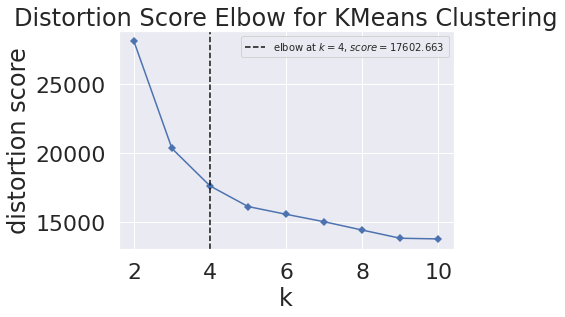

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

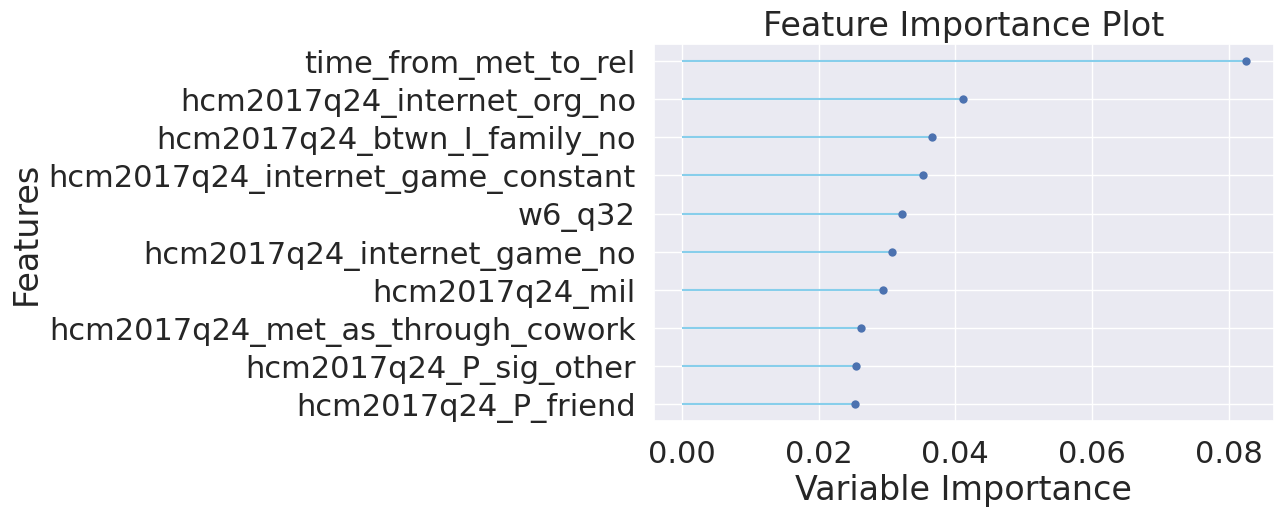

In [246]:
from pycaret.clustering import *
clu1 = setup(kmean_results[kmean_results['Cluster'].str.contains("1")],
            session_id = 123, ignore_features=droplist_age)
kmeans1 = create_model('kmeans', num_clusters=5)
kmean_results1 = assign_model(kmeans1)
kmean_results1.head()
plot_model(kmeans1, plot = 'elbow')

from pycaret.classification import *

clf1 = setup(data = kmean_results1, target = 'Cluster', ignore_features = droplist_age)
cluster1  = create_model('et') 
plot_model(estimator = cluster1, plot = 'feature')

**Cluster 2**

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

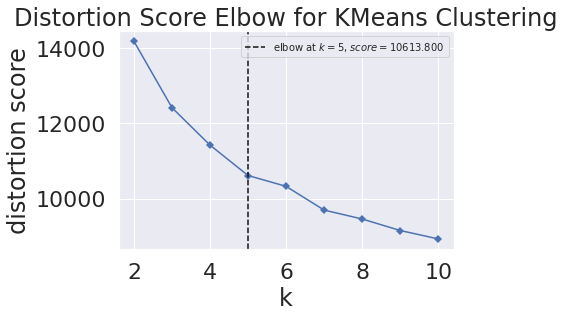

                        partyid7             ppc10017  \
0                Strong Democrat                  Yes   
1                Strong Democrat                  Yes   
2          Not Strong Republican  Don't know/not sure   
3                Strong Democrat                   No   
4          Not Strong Republican  Don't know/not sure   
..                           ...                  ...   
502              Strong Democrat                  Yes   
503            Strong Republican                   No   
504               Leans Democrat                  Yes   
505             Leans Republican                  Yes   
506  Undecided/Independent/Other            Not asked   

                                   ppc21310   ppp20071               ppp20072  \
0                                 Every day  Not asked                  Never   
1                                 Every day  Not asked    Once a year or less   
2                                 Every day        Yes            Once a

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

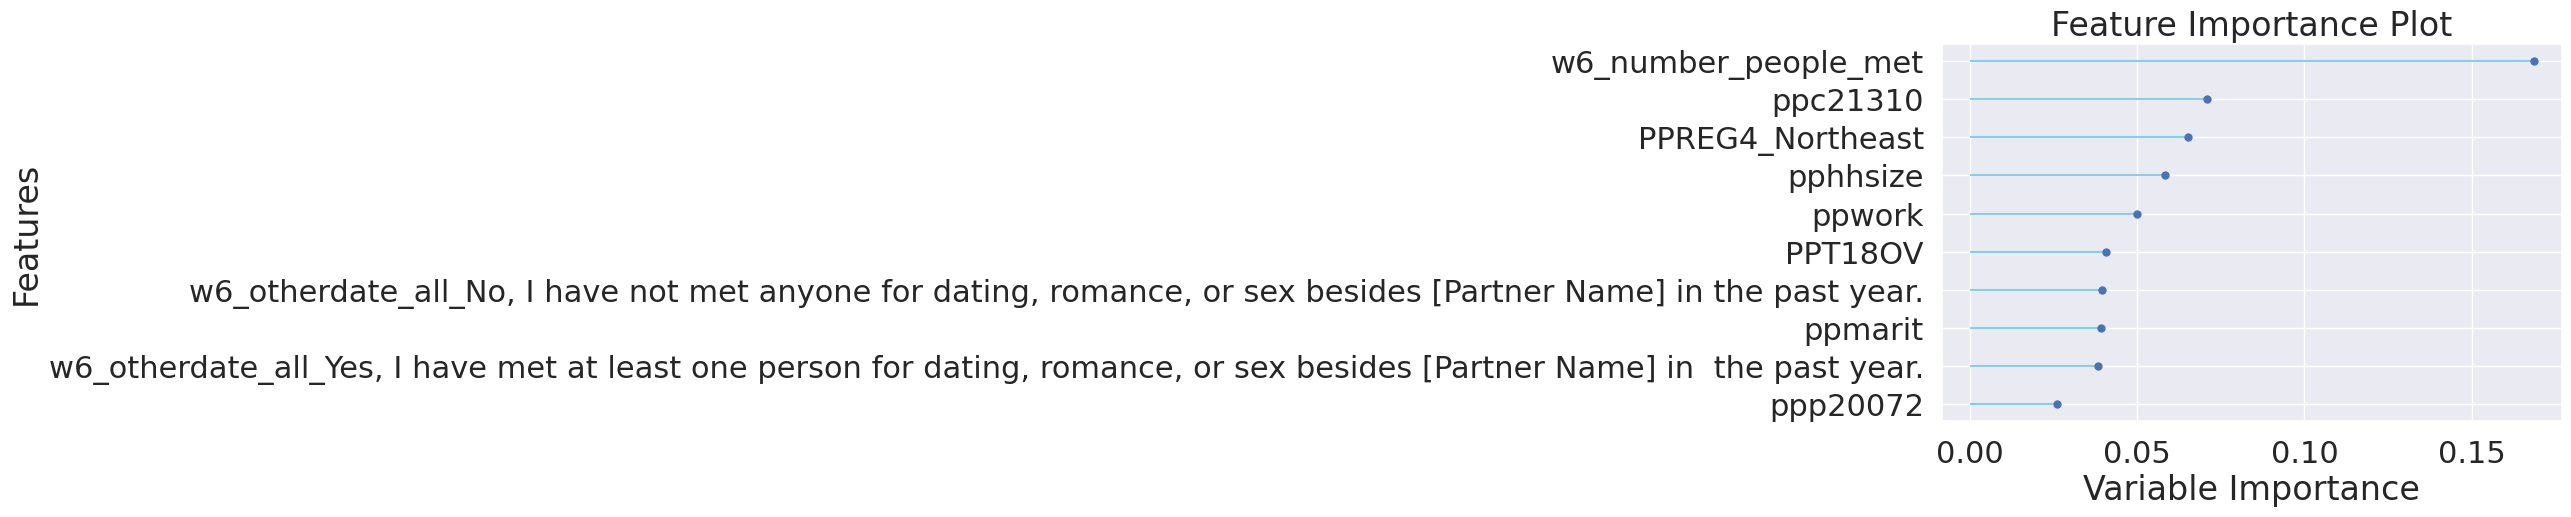

In [250]:
from pycaret.clustering import *
clu1 = setup(kmean_results[kmean_results['Cluster'].str.contains("2")],
            session_id = 123, ignore_features=droplist_age)
kmeans2 = create_model('kmeans', num_clusters=2)
kmean_results2 = assign_model(kmeans2)
kmean_results2.head()
plot_model(kmeans2, plot = 'elbow')
print(kmean_results2)
from pycaret.classification import *

clf1 = setup(data = kmean_results2, target = 'Cluster', ignore_features = droplist_age)
cluster2  = create_model('et') 
plot_model(estimator = cluster2, plot = 'feature')

**Cluster** 3

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

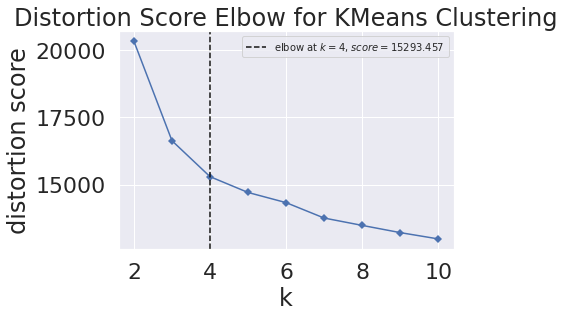

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

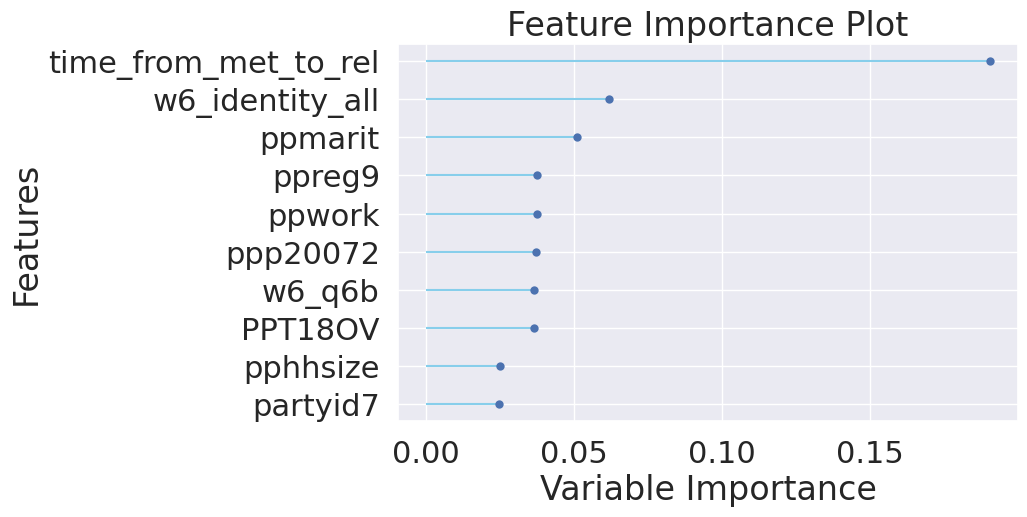

In [255]:
from pycaret.clustering import *
clu3 = setup(kmean_results[kmean_results['Cluster'].str.contains("3")],
            session_id = 123, ignore_features=droplist_age)
kmeans3 = create_model('kmeans', num_clusters=5)
kmean_results3 = assign_model(kmeans3)
kmean_results3.head()
plot_model(kmeans3, plot = 'elbow')

from pycaret.classification import *

clf1 = setup(data = kmean_results3, target = 'Cluster', ignore_features = droplist_age)
cluster3  = create_model('et') 
plot_model(estimator = cluster3, plot = 'feature')

**Cluster 4**

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

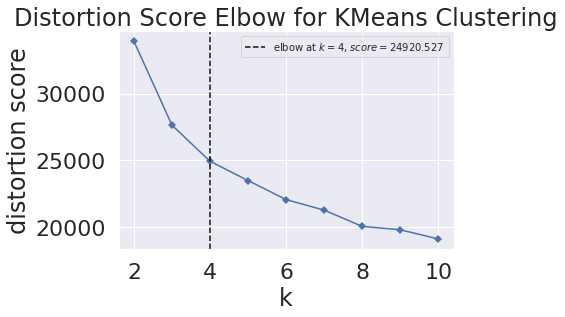

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

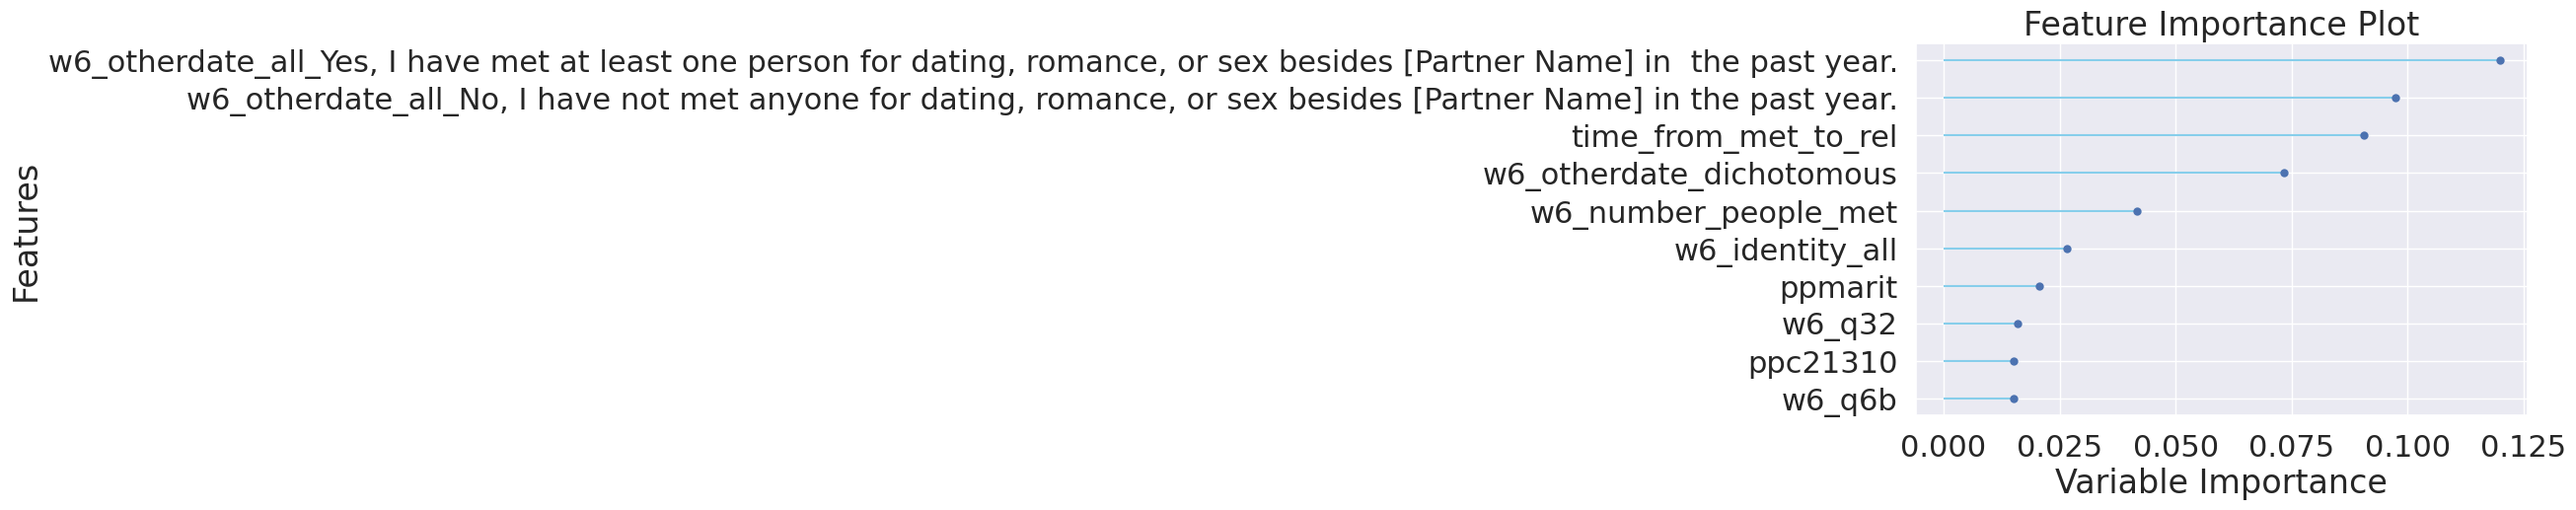

In [256]:
from pycaret.clustering import *
clu4 = setup(kmean_results[kmean_results['Cluster'].str.contains("4")],
            session_id = 123, ignore_features=droplist_age)
kmeans4 = create_model('kmeans', num_clusters=5)
kmean_results4 = assign_model(kmeans4)
kmean_results4.head()
plot_model(kmeans4, plot = 'elbow')

from pycaret.classification import *

clf1 = setup(data = kmean_results4, target = 'Cluster', ignore_features = droplist_age)
cluster4 = create_model('et') 
plot_model(estimator = cluster4, plot = 'feature')

In [ ]:
# kmean_results = kmean_results.sort_values(by="Cluster")
# plt.figure(figsize=(20,10))
# plt.scatter(kmean_results["w6_q16"], kmean_results["Cluster"], alpha=0.6,s=150)

# plt.show()

In [ ]:
# plt.figure(figsize=(20,10))
# plt.scatter(kmean_results["w6_q16"],  alpha=0.6,s=150)

# plt.show()

In [ ]:
# import seaborn as sns

# kmean_results = kmean_results.sort_values(by="Cluster")
# kmean_results["w6_q16"] = kmean_results["w6_q16"].fillna(-1).astype(int)

# plt.figure(figsize=(20,10))
# sns.set(font_scale=2)
# chart = sns.countplot(data=kmean_results, x="w6_q16", hue="Cluster")
# sns.move_legend(chart, "upper right", title='Clusters')
# chart.set_xticklabels(chart.get_xticklabels(), rotation=30, horizontalalignment="right")
# plt.title("")
# plt.xlabel("how many relatives see in person each month ")
# plt.ylabel("Frequancy")

In [ ]:
# kmean_results0["ppp20072"].value_counts()

In [ ]:
# import seaborn as sns

# kmean_results0 = kmean_results0.sort_values(by="Cluster")

# plt.figure(figsize=(20,10))
# sns.set(font_scale=2)
# chart = sns.countplot(data=kmean_results0, x="ppp20072", hue="Cluster")
# chart.set_xticklabels(chart.get_xticklabels(), rotation=30, horizontalalignment="right")
# plt.xlabel(" How often do you attendreligious services? ")
# plt.ylabel("Number of attendancies")
